In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm

# Value at Risk 
Aqui faremos o VAR, diário e quinzenal, da petrobras usando os valores de abertura da empresa de 10/2014 até 12/2020.
 
Usaremos 2 métodos:  
Método da série histórica, usa puramente a série histórica e não faz mais nenhuma suposição sobre os retornos.  
Método da variância, usaremos a série histórica para pegarmos a média e a variância dos retornos, com isso construiremos uma normal, e iremos 
inferir o VAR supondo que os retornos se dão por essa distribuição.

Dados retirados de https://www.kaggle.com/datasets/felsal/ibovespa-stocks

## Método da série histórica

In [2]:
dados = pd.read_csv('b3.csv')

In [3]:
petro = dados[dados['ticker'] == 'PETR4']
petro = petro[4100:6400]  # Selecionando a faixa de tempo 10/2014 até 12/2020

In [4]:
display(petro)

,datetime,ticker,open,close,high,low,volume
1319937,2014-10-08,PETR4,21.80,20.85,21.85,20.01,2.170526e+09
1320246,2014-10-09,PETR4,21.29,21.20,21.90,21.20,1.772180e+09
1320554,2014-10-10,PETR4,20.90,20.02,21.14,20.02,1.334326e+09
1320861,2014-10-13,PETR4,21.36,22.13,22.42,21.11,1.861346e+09
1321173,2014-10-14,PETR4,21.82,21.65,22.53,21.40,1.771690e+09
...,...,...,...,...,...,...,...
1881969,2020-12-22,PETR4,27.20,27.28,27.47,27.05,1.268321e+09
1881970,2020-12-23,PETR4,27.43,27.95,28.25,27.35,1.368939e+09
1881971,2020-12-28,PETR4,28.36,28.18,28.52,28.18,1.027841e+09
1881972,2020-12-29,PETR4,28.38,28.27,28.43,27.99,8.433475e+08


O próximo passo é calcular a série histórica de retornos nesse período de tempo, para isso : 

In [5]:
def retorno_diario(acao):
    """Dado um dataframe com as informações de uma ação, ele utiliza o valor de abertura para calcular a série de retornos diários.
    dataframe -> array"""
    
    v_open = np.array(acao['open'])

    ret = (v_open[1:] - v_open[:-1]) / v_open[:-1]

    return ret

In [6]:
def retorno_Quinzenal(acao):
    """Dado um dataframe com as informações de uma ação, ele utiliza o valor de abertura para calcular a série de retornos quinzenais.
    dataframe -> array"""
    
    v_open = np.array(acao['open'])
    
    v_open_15 = v_open[range(0, len(v_open), 15)]   # Cria um vetor com o valor de abertura de 15 em 15 dias.

    ret = (v_open_15[1:] - v_open_15[:-1]) / v_open_15[:-1]

    return ret

In [7]:
retornos_diario = retorno_diario(petro)             # Série de retornos diários da petrobras
retornos_quinzenal = retorno_Quinzenal(petro)       # Série de retornos quinzenais da petrobras
retornos = [retornos_diario, retornos_quinzenal]    # Lista com ambos os retornos

tempos = ['Diários', 'Quinzenais']
valores = [(-0.035, -0.05), (-0.16, -0.22)]         # Valores os quais, o Var será com 90% e 95%, primeiro o diário, segundo o quinzenal


Quantidade de retornos Diários total: 1539

Quantidade de retornos Diários menores que -0.035% : 146
Com 90.513% de chance, o maior valor a ser perdido será 0.035% do valor investido.

Quantidade de retornos Diários menores que -0.05% : 81
Com 94.737% de chance, o maior valor a ser perdido será 0.05% do valor investido.


Quantidade de retornos Quinzenais total: 102

Quantidade de retornos Quinzenais menores que -0.16% : 11
Com 89.216% de chance, o maior valor a ser perdido será 0.16% do valor investido.

Quantidade de retornos Quinzenais menores que -0.22% : 4
Com 96.078% de chance, o maior valor a ser perdido será 0.22% do valor investido.



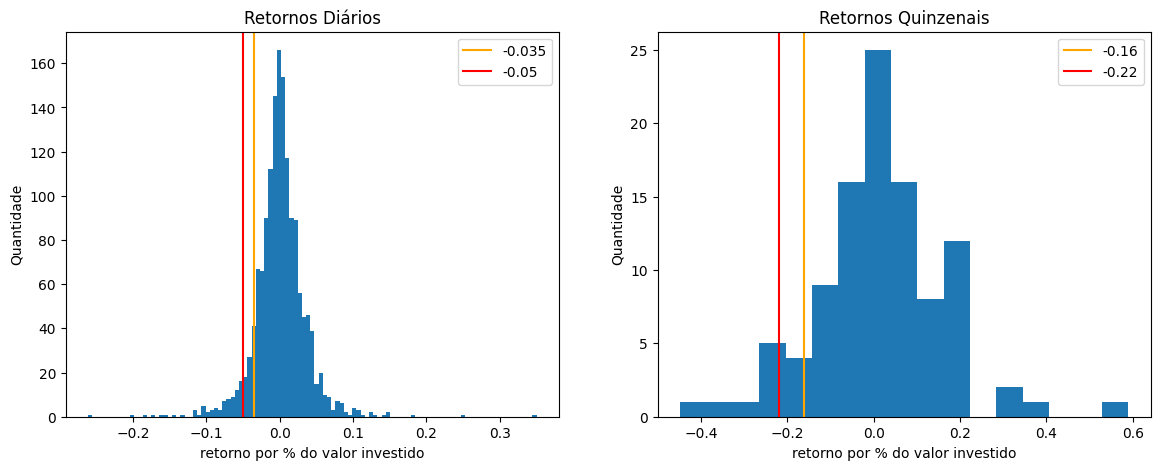

In [8]:
fig, plots = plt.subplots(1, 2, figsize=(14, 5))

for retorno, tempo, valor, ax in zip(retornos, tempos, valores, plots):    # Para não escrevermos o mesmo código 2 vezes, faço esse loop.
    caixinha = 0
    caixinha2 = 0

    for i in retorno: # Para cada retorno da série histórica, verifica se está em cada uma das caixinhas
        if i < valor[0]:    
            caixinha += 1
        
        if  i < valor[1]:
            caixinha2 += 1

    print(f'\nQuantidade de retornos {tempo} total: {len(retorno)}\n')

    ax.hist(retorno, bins='auto')
    ax.set_title(f'Retornos {tempo}')
    ax.set_ylabel('Quantidade')
    ax.set_xlabel('retorno por % do valor investido')
    ax.axvline(valor[0], color='orange', label=valor[0])
    ax.axvline(valor[1], color='red', label=valor[1])
    ax.legend()


    print(f'Quantidade de retornos {tempo} menores que {valor[0]}% : {caixinha}')      
    print(f'Com {(1 - caixinha/len(retorno))*100 :.3f}% de chance, o maior valor a ser perdido será {abs(valor[0])}% do valor investido.')

    print(f'\nQuantidade de retornos {tempo} menores que {valor[1]}% : {caixinha2}')
    print(f'Com {(1 - caixinha2/len(retorno))*100 :.3f}% de chance, o maior valor a ser perdido será {abs(valor[1])}% do valor investido.\n')

# A expressão usada é a seguinte:
# O VAR quinzenal com 90% é de N reais

Aqui podemos atestar que os nossos resultados seguem a teoria.  
Pois, em uma intuição informal, o VAR é o maior valor possível que perderá, dado uma certa porcentagem.  
Ou seja, se colocarmos essa possível perda muito grande fica cada vez mais complicado termos uma perda que seja maior do que essa.  
E nos nossos testes, aumentando o maior valor possível aumenta-se a chance.  
Assim como faz sentido o VAR quinzenal ser maior que o diário, pois o investidor fica 'vulnerável' por mais tempo.

## Método da variância e o uso da curva normal

In [9]:
def retorno_normal_diario(acao):
    """Dado um dataframe com as informações de uma ação, ele utiliza o valor de abertura para
    retornar o array com os retornos diário, o retorno diário médio, a variância, e o desvio padrão dos retornos.
    dataframe -> (array, float, float, float)"""
    
    v_open = np.array(acao['open']) # Pegando os valores de aberturas diários
    
    ret = (v_open[1:] - v_open[:-1]) / v_open[:-1]  # Criando o array com os retornos diários
    
    media = np.mean(ret) # Retorno médio
    var = statistics.variance(ret) # Variancia AMOSTRAL!
    sd = var**(1/2)

    return ret, media, var, sd

In [10]:
def retorno_normal_quinzenal(acao):
    """Dado um dataframe com as informações de uma ação, ele utiliza o valor de abertura para
    retornar o retorno diário médio, a variância, e o desvio padrão dos retornos.
    dataframe -> (array, float, float, float)"""
    
    v_open = np.array(acao['open'])
    
    v_open_15 = v_open[range(0, len(v_open), 15)]   # Criando um array dos valores de aberturas de 15 em 15 dias.

    ret = (v_open_15[1:] - v_open_15[:-1]) / v_open_15[:-1] # Criando o array com os retornos quinzenais
    
    media = np.mean(ret) # Retorno médio
    var = statistics.variance(ret) # Variancia AMOSTRAL!
    sd = var**(1/2)

    return ret, media, var, sd

Média 0.0008173892084351311, variância 0.0012942038834824069, desvio padrão 0.03597504528812169


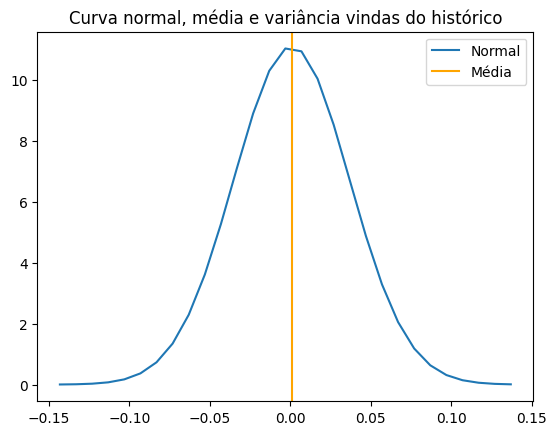

In [11]:
ret, mi, sigma, sd = retorno_normal_diario(petro)

print(f'Média {mi}, variância {sigma}, desvio padrão {sd}')

intervalo = np.arange(mi- 4*sd, mi + 4*sd, 0.01)
  
plt.plot(intervalo, norm.pdf(intervalo, mi, sd), label='Normal')
plt.axvline(mi, color='orange', label='Média')

plt.title('Curva normal, média e variância vindas do histórico')
plt.legend()
plt.show()

In [12]:
print(f"Supondo, que os nossos retornos sigam essa distribuição, temos que:\n"
      f"com 90% o VaR (percentual) é de {abs(mi - 1.281*sd) :.4}% do valor investido.")

print(f"\nCom 95% o VaR (percentual) é de {abs(mi - 1.645*sd) :.4}% do valor investido.")

Supondo, que os nossos retornos sigam essa distribuição, temos que:
com 90% o VaR (percentual) é de 0.04527% do valor investido.

Com 95% o VaR (percentual) é de 0.05836% do valor investido.
